<a href="https://colab.research.google.com/github/Mr3lueSky/Synaptix-Techathlon-23/blob/main/Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:


! cp kaggle.json ~/.kaggle/

In [ ]:
api_token = {"username":"rishikesh1218","key":"d568d773595638f726a186a8c1cf9b2b"}
import json
import zipfile
import os
with open('/content/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json
!kaggle config set -n path -v /content
!kaggle datasets download -d rishikesh1218/ctscan
os.chdir('/content/datasets/rishikesh1218/ctscan')
for file in os.listdir():
    zip_ref = zipfile.ZipFile(file, 'r')

- path is now set to: /content
100% 2.28G/2.28G [02:11<00:00, 23.4MB/s]
100% 2.28G/2.28G [02:11<00:00, 18.6MB/s]


In [ ]:
import zipfile

# Unzip the dataset
local_zip = './ctscan.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./ctscan')
zip_ref.close()

In [ ]:
import os

os.chdir('/content')

# Directory with our training normal pictures
train_normal_dir = os.path.join('./chest_xray/train/NORMAL')

# Directory with our training pneumonia pictures
train_pneumonia_dir = os.path.join('./chest_xray/train/PNEUMONIA')

# Directory with validation normal pictures
validation_normal_dir = os.path.join('./chest_xray/val/NORMAL')

# Directory with validation pneumonia pictures
validation_pneumonia_dir = os.path.join('./chest_xray/val/PNEUMONIA')

In [ ]:
train_normal_names = os.listdir(train_normal_dir)
print(f'TRAIN SET NORMAL: {train_normal_names[:10]}')

train_pneumonia_names = os.listdir(train_pneumonia_dir)
print(f'TRAIN SET PNEUMONIA: {train_pneumonia_names[:10]}')

validation_normal_names = os.listdir(validation_normal_dir)
print(f'VAL SET NORMAL: {validation_normal_names[:10]}')

validation_pneumonia_names = os.listdir(validation_pneumonia_dir)
print(f'VAL SET PNEUMONIA: {validation_pneumonia_names[:10]}')

TRAIN SET NORMAL: ['NORMAL2-IM-1222-0001.jpeg', 'NORMAL2-IM-1412-0001.jpeg', 'NORMAL2-IM-0736-0001.jpeg', 'NORMAL2-IM-1345-0001.jpeg', 'IM-0553-0001-0003.jpeg', 'IM-0551-0001-0001.jpeg', 'IM-0312-0001.jpeg', 'IM-0283-0001.jpeg', 'NORMAL2-IM-1371-0001.jpeg', 'NORMAL2-IM-0662-0001.jpeg']
TRAIN SET PNEUMONIA: ['person502_virus_1012.jpeg', 'person625_virus_1199.jpeg', 'person1691_bacteria_4479.jpeg', 'person965_virus_1638.jpeg', 'person1026_bacteria_2957.jpeg', 'person73_bacteria_360.jpeg', 'person582_bacteria_2403.jpeg', 'person296_bacteria_1396.jpeg', 'person1638_bacteria_4341.jpeg', 'person1458_virus_2501.jpeg']
VAL SET NORMAL: ['NORMAL2-IM-1430-0001.jpeg', 'NORMAL2-IM-1442-0001.jpeg', 'NORMAL2-IM-1440-0001.jpeg', 'NORMAL2-IM-1431-0001.jpeg', 'NORMAL2-IM-1437-0001.jpeg', 'NORMAL2-IM-1438-0001.jpeg', 'NORMAL2-IM-1436-0001.jpeg', 'NORMAL2-IM-1427-0001.jpeg']
VAL SET PNEUMONIA: ['person1946_bacteria_4875.jpeg', 'person1952_bacteria_4883.jpeg', 'person1947_bacteria_4876.jpeg', 'person1949_b

In [ ]:
print(f'total training normal images: {len(os.listdir(train_normal_dir))}')
print(f'total training pneumonia images: {len(os.listdir(train_pneumonia_dir))}')
print(f'total validation normal images: {len(os.listdir(validation_normal_dir))}')
print(f'total validation pneumonia images: {len(os.listdir(validation_pneumonia_dir))}')

total training normal images: 1341
total training pneumonia images: 3875
total validation normal images: 8
total validation pneumonia images: 8


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

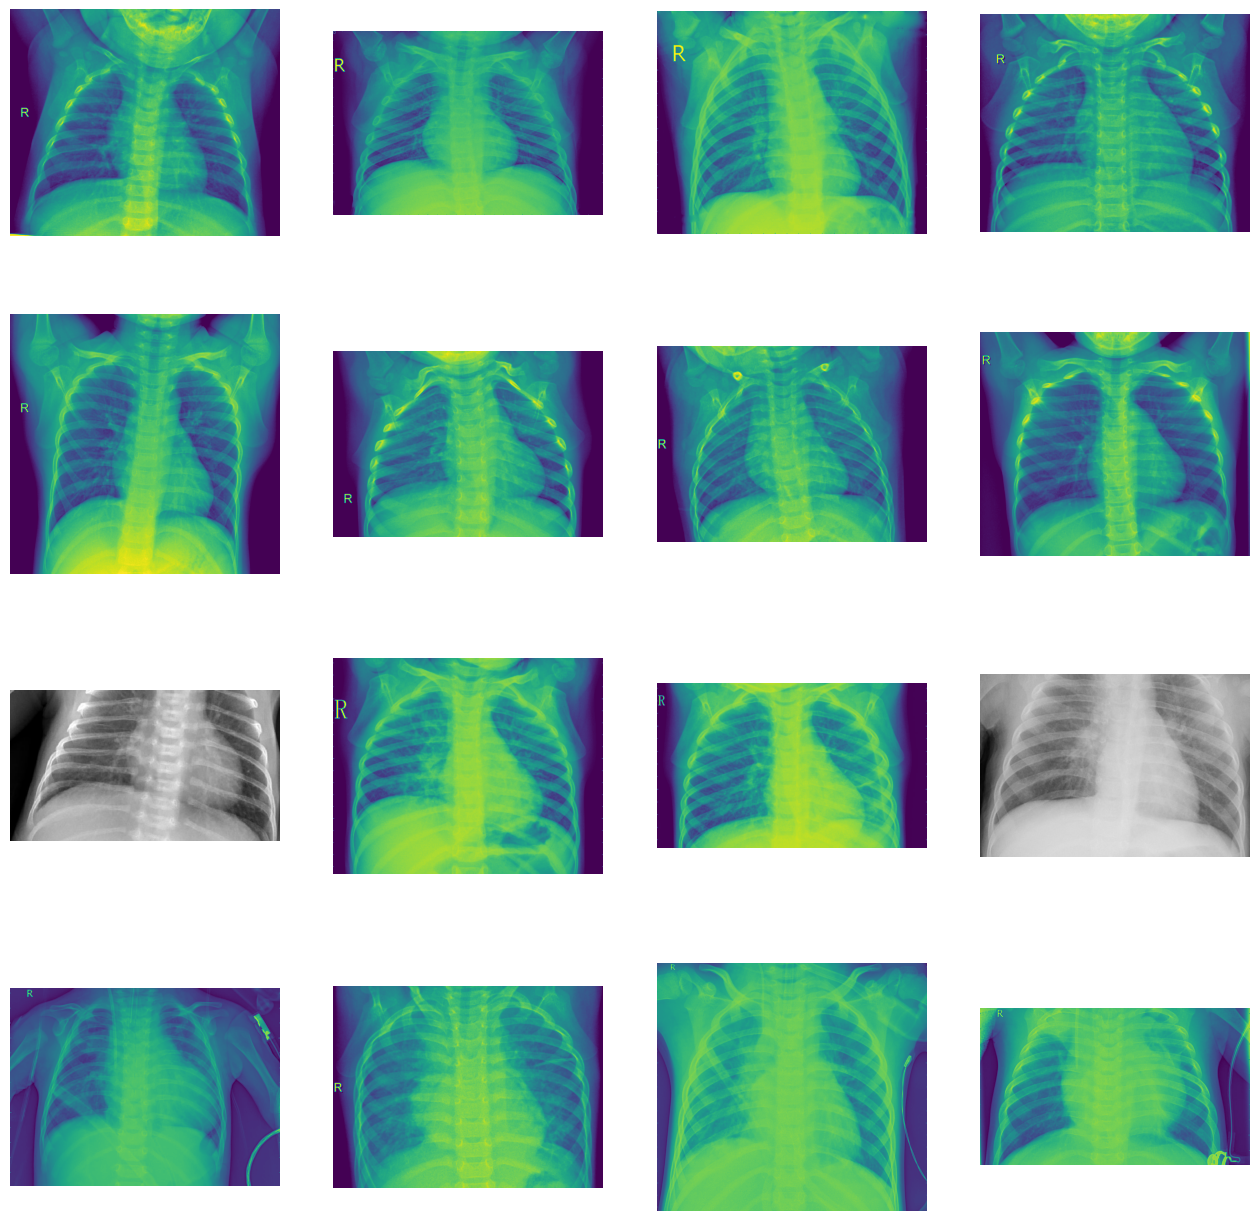

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_normal_pix = [os.path.join(train_normal_dir, fname)
                for fname in train_normal_names[pic_index-8:pic_index]]
next_pneumonia_pix = [os.path.join(train_pneumonia_dir, fname)
                for fname in train_pneumonia_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_normal_pix+next_pneumonia_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('normal') and 1 for the other ('pneumonia')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './chest_xray/train',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './chest_xray/val',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=1)

Epoch 1/15
8/8 [==============================] - 12s 2s/step - loss: 0.4846 - accuracy: 0.7930
Epoch 2/15
8/8 [==============================] - 12s 2s/step - loss: 0.3992 - accuracy: 0.8206
Epoch 3/15
8/8 [==============================] - 11s 1s/step - loss: 0.3592 - accuracy: 0.8516
Epoch 4/15
8/8 [==============================] - 12s 1s/step - loss: 0.3947 - accuracy: 0.8330
Epoch 5/15
8/8 [==============================] - 11s 1s/step - loss: 0.3428 - accuracy: 0.8633
Epoch 6/15
8/8 [==============================] - 12s 1s/step - loss: 0.3420 - accuracy: 0.8613
Epoch 7/15
8/8 [==============================] - 11s 1s/step - loss: 0.3204 - accuracy: 0.8555
Epoch 8/15
8/8 [==============================] - 11s 1s/step - loss: 0.3301 - accuracy: 0.8525
Epoch 9/15
8/8 [==============================] - 11s 1s/step - loss: 0.2365 - accuracy: 0.9131
Epoch 10/15
8/8 [==============================] - 11s 1s/step - loss: 0.7474 - accuracy: 0.8770
Epoch 11/15
8/8 [======================

In [ ]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " has pneumonia")
  else:
    print(fn + " doesn't have pneumonia")


Saving person1946_bacteria_4874.jpeg to person1946_bacteria_4874.jpeg
Saving person1946_bacteria_4875.jpeg to person1946_bacteria_4875.jpeg
Saving person1947_bacteria_4876.jpeg to person1947_bacteria_4876.jpeg
Saving person1949_bacteria_4880.jpeg to person1949_bacteria_4880.jpeg
Saving person1950_bacteria_4881.jpeg to person1950_bacteria_4881.jpeg
Saving person1951_bacteria_4882.jpeg to person1951_bacteria_4882.jpeg
Saving person1952_bacteria_4883.jpeg to person1952_bacteria_4883.jpeg
Saving person1954_bacteria_4886.jpeg to person1954_bacteria_4886.jpeg
1/1 [==============================] - 0s 21ms/step
[0.99969804]
person1946_bacteria_4874.jpeg has pneumonia
1/1 [==============================] - 0s 20ms/step
[0.9999285]
person1946_bacteria_4875.jpeg has pneumonia
1/1 [==============================] - 0s 23ms/step
[0.9977684]
person1947_bacteria_4876.jpeg has pneumonia
1/1 [==============================] - 0s 21ms/step
[0.7002623]
person1949_bacteria_4880.jpeg has pneumonia
1/1 [==

1/1 [==============================] - 0s 120ms/step


<ipython-input-26-412bf2313f75>:45: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


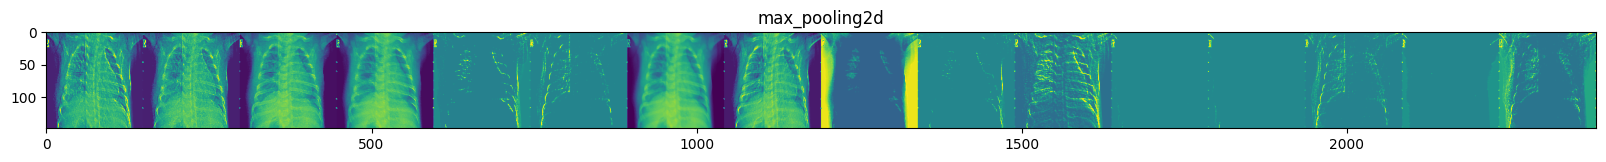

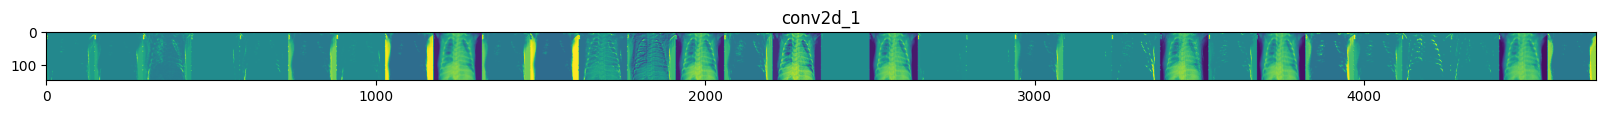

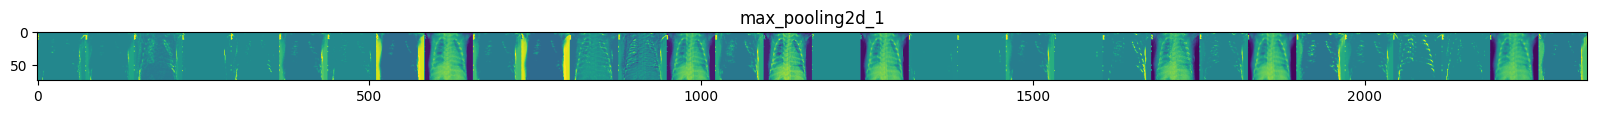

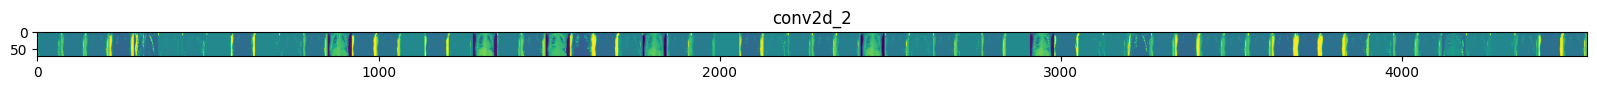

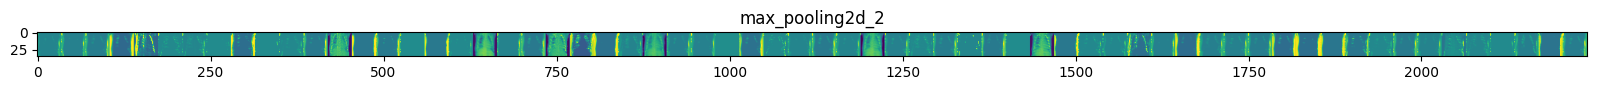

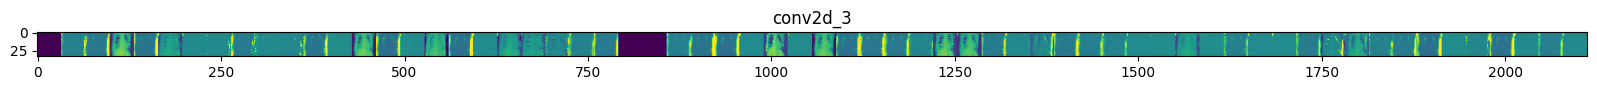

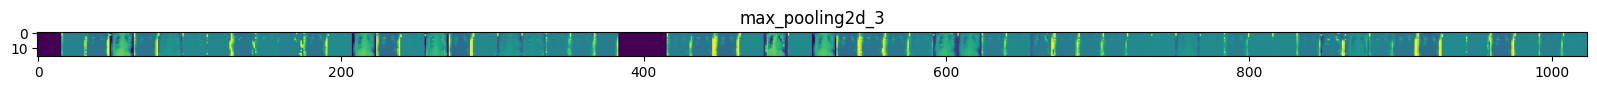

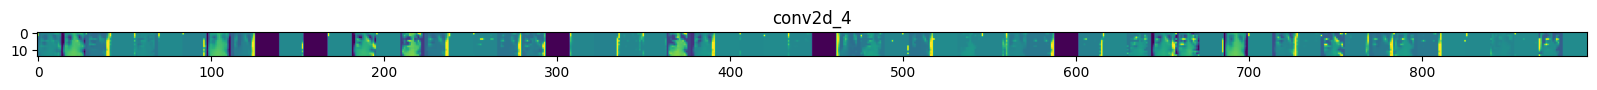

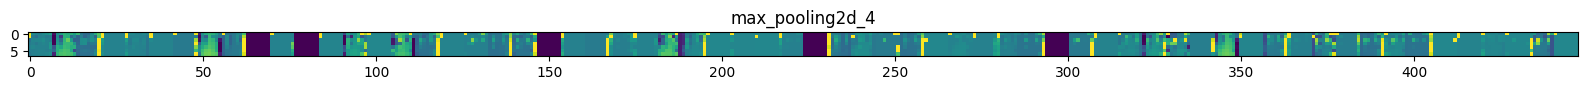

In [ ]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
normal_img_files = [os.path.join(train_normal_dir, f) for f in train_normal_names]
pneumonia_img_files = [os.path.join(train_pneumonia_dir, f) for f in train_pneumonia_names]
img_path = random.choice(normal_img_files + pneumonia_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')